In [1]:
!pip install SRPAstro
!pip install astroML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 22.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 48.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.

From: https://www.astroml.org/book_figures/chapter10/fig_chirp2_PSD.html

In [2]:
import astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle as LS
from SRP.SRPPlot.SetPlotPars import SetPlotPars
from astroML.fourier import FT_continuous, IFT_continuous, wavelet_PSD

In [3]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

/usr/local/lib/python3.10/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [4]:
#------------------------------------------------------------
# Define the chirp signal
def chirp(t, T, A, phi, omega, beta):
    signal = A * np.sin(phi + omega * (t - T) + beta * (t - T) ** 2)
    signal[t < T] = 0
    return signal


#def background(t, b0, b1, Omega1, Omega2):
#    return b0 + b1 * np.sin(Omega1 * t) * np.sin(Omega2 * t)

np.random.seed(42)
N = 4096
t = np.linspace(-50, 50, N)
h_true = chirp(t, -20, 0.8, 0, 0.2, 0.02)
h = h_true + np.random.normal(0, 1, N)

Let's give a look at the light curve. Please remeber that fuxes are in arbitrary units.

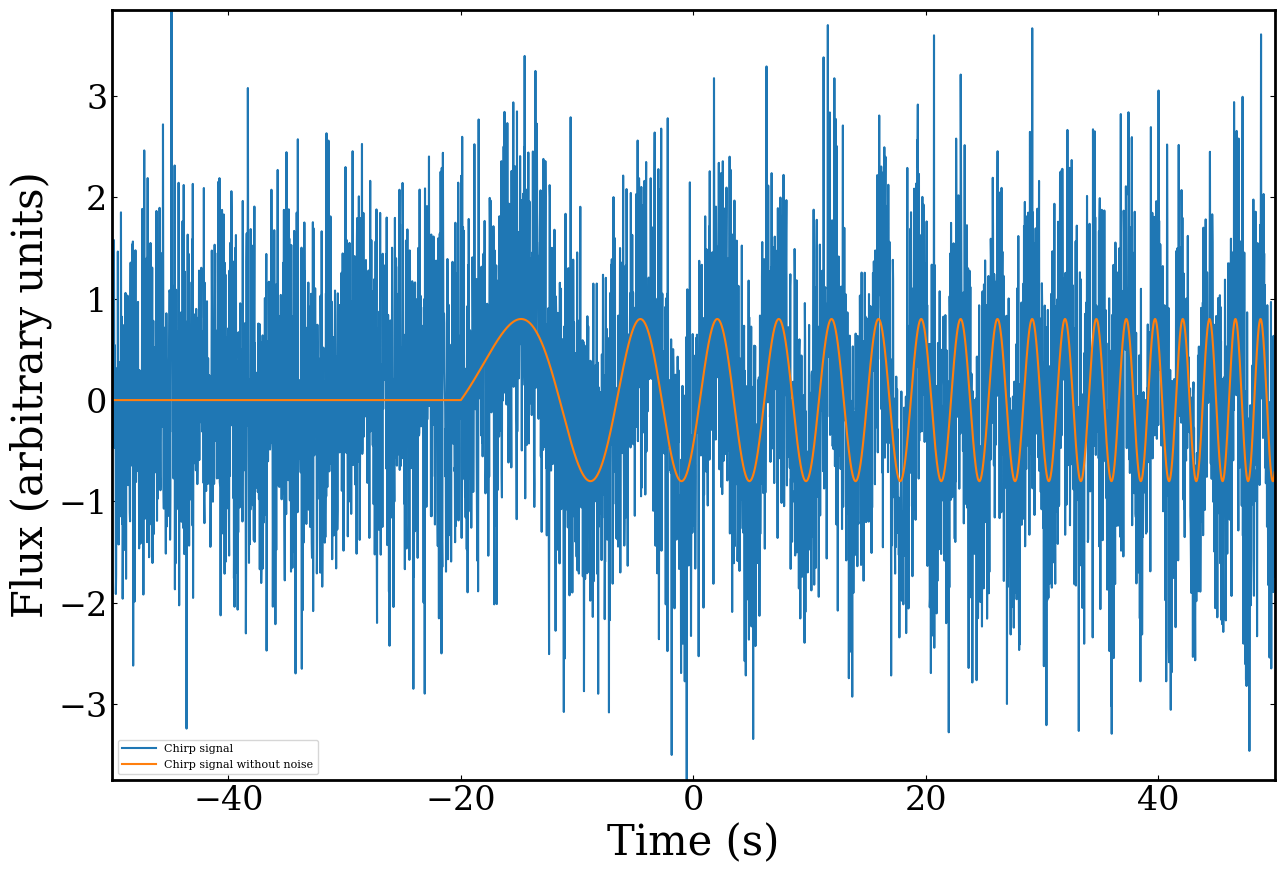

In [8]:
p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,"Time (s)","Flux (arbitrary units)")
plt.plot(t,h,'-',label='Chirp signal')
plt.plot(t,h_true,'-',label='Chirp signal without noise')
plt.legend()
plt.show()

Now let's compute a LS periodogram

In [9]:
ls = LS(t,h)
freq,power = ls.autopower(nyquist_factor=1,samples_per_peak=10)

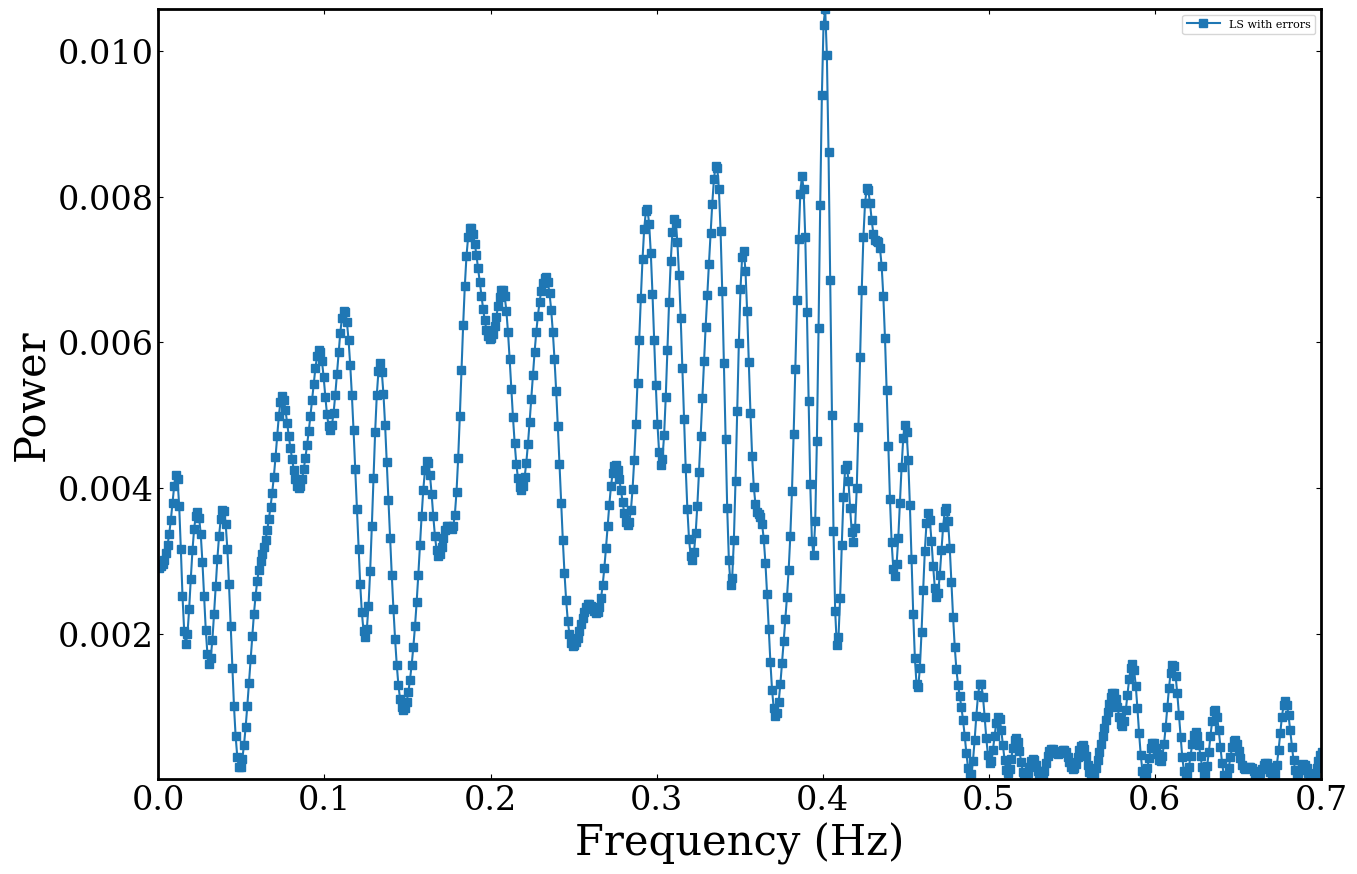

In [10]:
p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,"Frequency (Hz)","Power")
plt.plot(freq,power,'s-',label='LS with errors')
plt.legend()
plt.xlim((0,0.7))
plt.show()

## Specgram

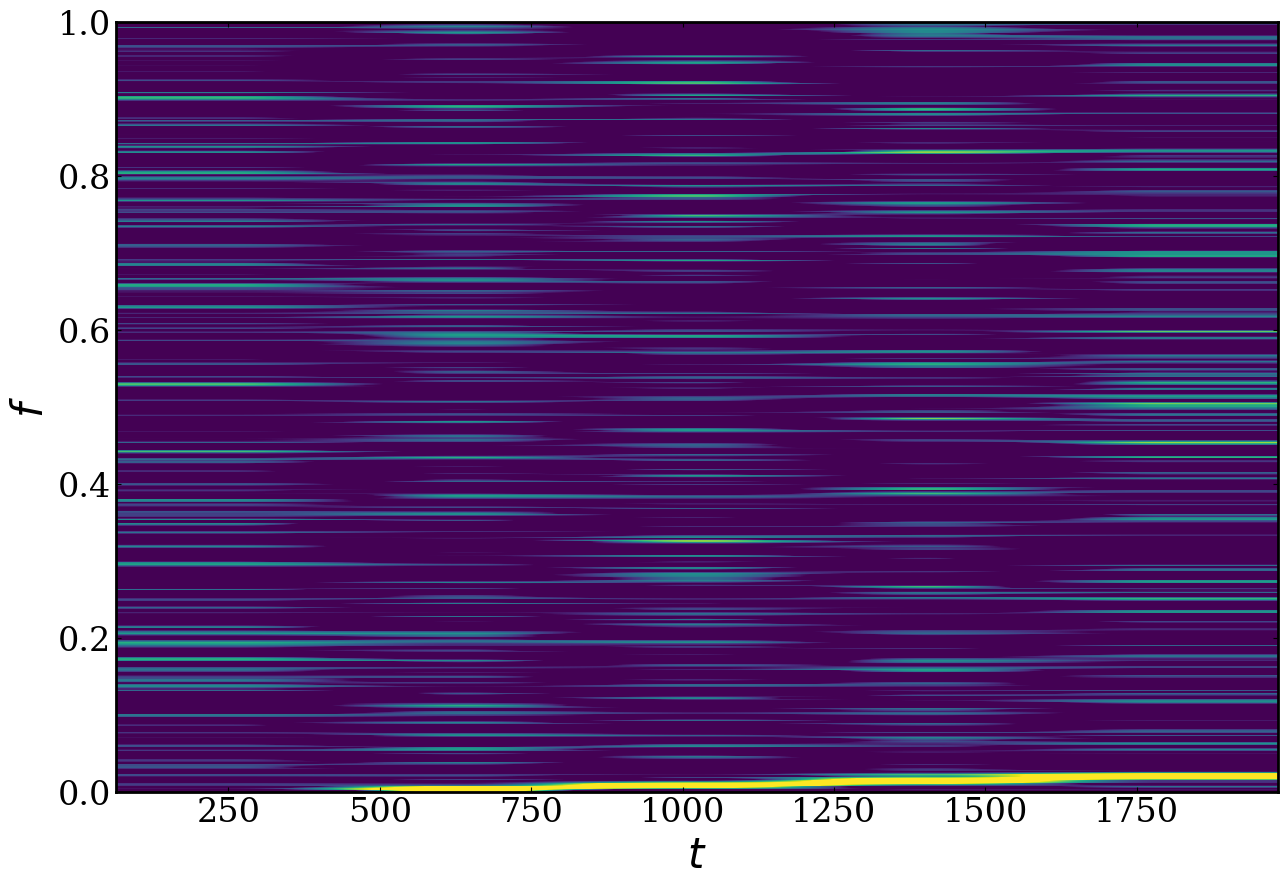

In [11]:
# The `specgram` method returns 4 objects. They are:
# - power: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot

p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,"$t$", "$f$")
power, freqs, bins, im = plt.specgram(h, NFFT=1024, Fs=2, noverlap=256, vmin=0,vmax=10)
plt.show()

The output of specgram consistes of an array of frequencies, of time bins and powers for any time bin.

In [ ]:
print(freqs.shape,bins.shape,power.shape)

(513,) (5,) (513, 5)


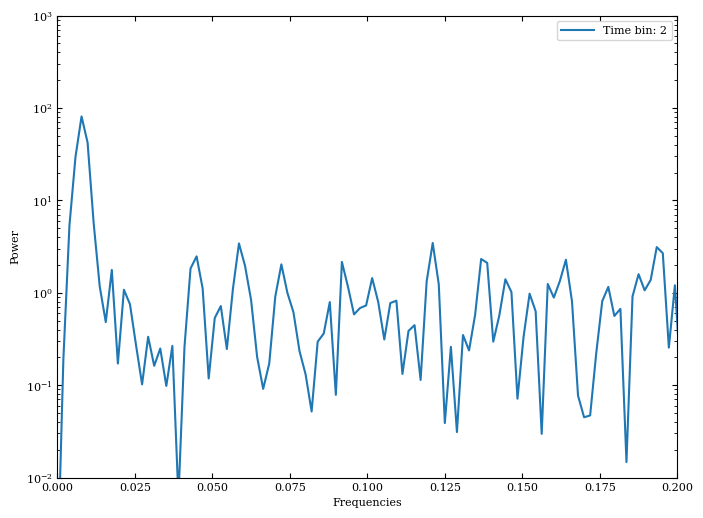

In [12]:
TBIN = 2
p = plt.figure(figsize=(8,6))
plt.plot(freqs,power[:,TBIN],label='Time bin: {}'.format(TBIN))
plt.semilogy()
plt.xlabel("Frequencies")
plt.ylabel("Power")
plt.xlim(0,0.2)
plt.ylim(1e-2,1e3)
plt.legend();

## Wavelets

In [13]:
f0 = np.linspace(0.04, 0.6, 100)
wPSD = wavelet_PSD(t, h, f0, Q=1.0)

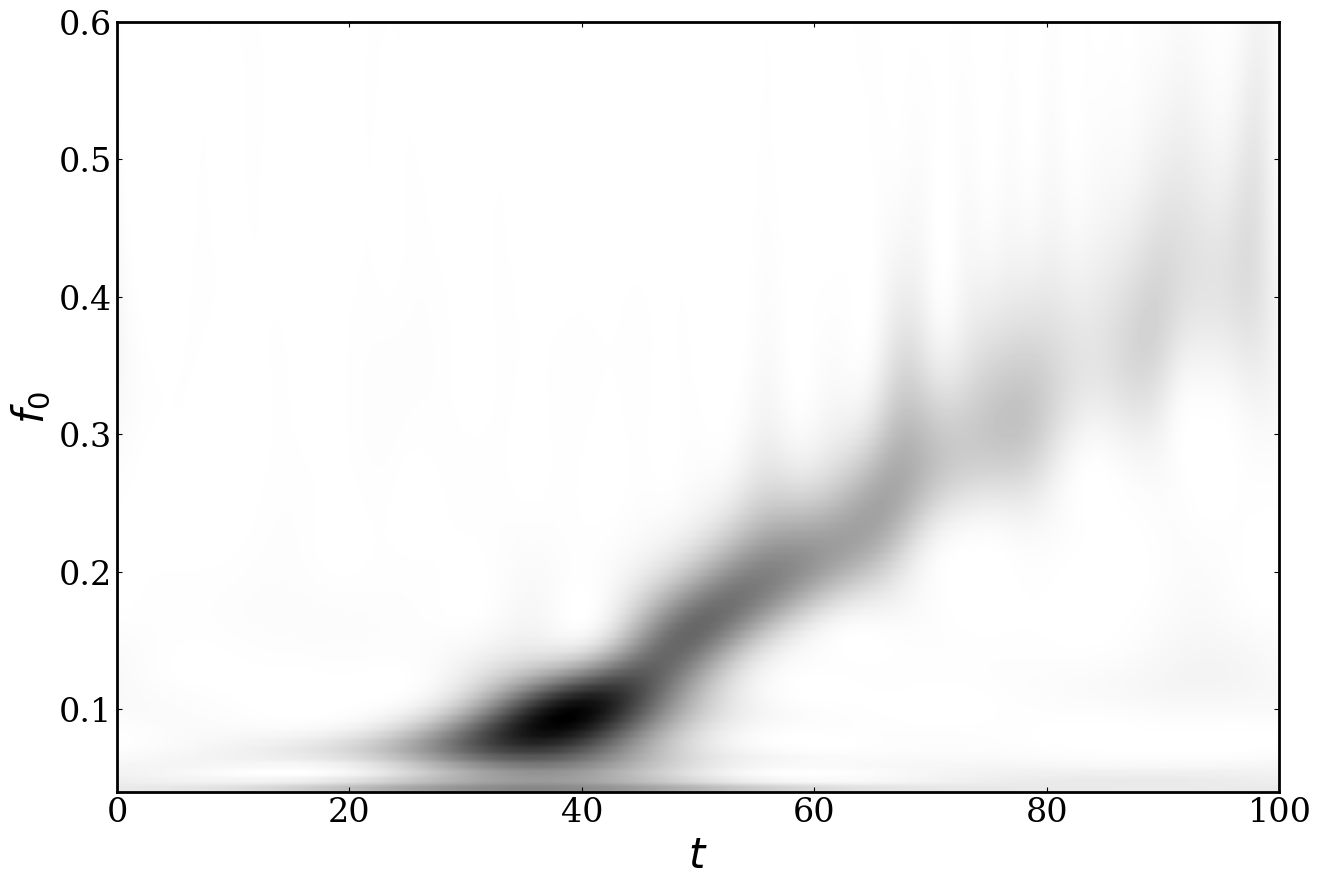

In [14]:
p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,'$t$', '$f_0$')
px.imshow(wPSD,origin='lower', aspect='auto',
          extent=[t[0] + 50, t[-1] + 50, f0[0], f0[-1]],
          cmap=plt.cm.binary)
px.set_xlim(0, 100)
px.set_ylim(0.04, 0.6001)

plt.show()